# STA365 Homework 1
#### Name: Maggie Huang
#### ID: 1005106920

## Question 1
What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

## Answer to Q1

$P(pass | quick) = \frac{P(pass)P(quick|pass)}{P(quick)}$

$ = \frac{P(pass)P(quick|pass)}{P(pass)P(quick|pass) + P(not pass)P(quick|not pass)}$

$ = \frac{(0.9)(0.6)}{(0.9)(0.6) + (0.1)(0.3)}$

$ =  0.947368421$

94.7% of students who answer the question quickly will pass the class. 

## Question 2
 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

## Answer to Q2

The distributions needed are the following:

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \frac{n!}{x_{1}!x_{2}!...x_{n}!} \prod_{i=1}^n \theta^{x_i} \texttt{ where } x_{i} \geq 0 \texttt{ and } \sum_{i=1}^n x_i = n\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \frac{1}{\beta(\alpha)} \prod_{i=1}^n \theta_{i}^{\alpha_{i}-1}  \texttt{ where } \beta(\alpha) = \frac{\prod_{i=1}^n \gamma(\alpha_{i})}{\gamma(\sum_{i=1}^n \alpha_{i})} \texttt{ and } \alpha = (\alpha_{1}, \alpha_{2},...\alpha_{n}) \\ 
\end{align*}

The posterior distribution is the following:

\begin{align*}
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \frac{c c' \prod_{i=1}^n \theta^{x_i + \alpha_{i} - 1}}{c''}\\
\end{align*}

Note that $c'' = p(x)$ and is the normalizing constant, $c = \frac{n!}{x_{1}!x_{2}!...x_{n}!}$ and is the normalizing constant of the multinomial distribution, and $c' = \frac{1}{\beta(\alpha)}$ and is the normalizing constant of the Dirichlet distribution.

The posterior distribution is a Dirichlet distribution.
Its updated parameter is $x_i + \alpha_i$.

## Question 3
Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

## Answer to Q3

In [1]:
pip install numpy matplotlib scipy python-ternary

  Using cached python_ternary-1.0.8-py3-none-any.whl.metadata (1.0 kB)
Using cached python_ternary-1.0.8-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as ff
import ternary 

In [17]:
sample_size = 10 
total_trials = 10

# Multinomial distribution has 3 categories
categories = ['Category 1', 'Category 2', 'Category 3'] 

# Probabilities for Category 1, 2, and 3 respectively. Probabilities add to 1
multinomial_probabilities = [0.3, 0.6, 0.1]

# Generate sample from likelihood multinomial distribution
multinomial_likelihood = stats.multinomial.rvs(n=sample_size, p = multinomial_probabilities, size = total_trials)

# Aggregate counts across all simulations for each category
category_totals = multinomial_likelihood.sum(axis=0)

# Alpha values for prior Dirichlet distribution 
prior_dirichlet_alphas = [1.1, 1.1, 1.1] 

# Alpha values for posterior Dirichlet distribution
posterior_dirichlet_alphas = prior_dirichlet_alphas + category_totals 

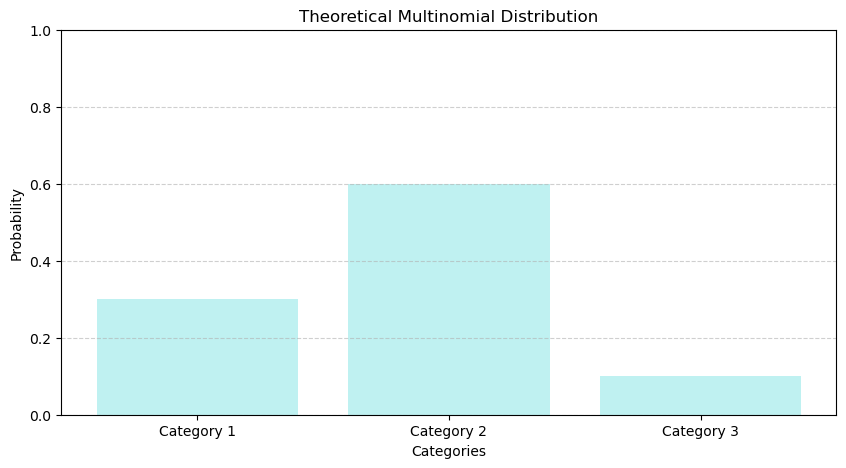

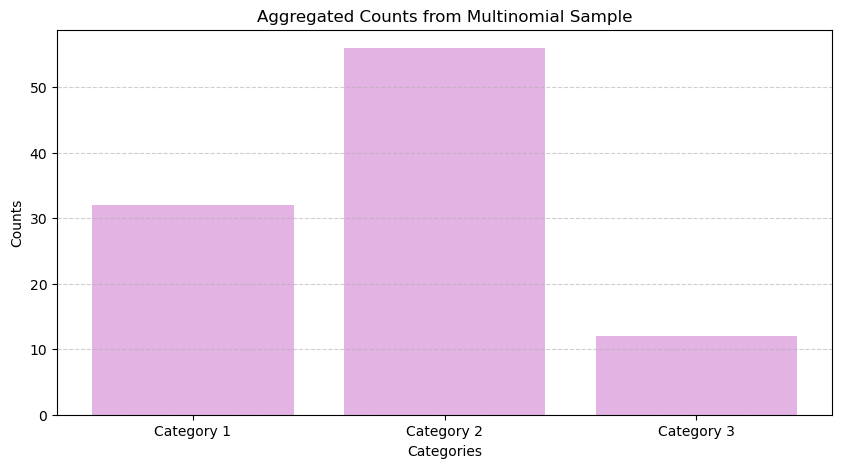

In [18]:
# Visualize the theoretical likelihood multinomial distribution
plt.figure(figsize=(10, 5))
plt.bar(categories, multinomial_probabilities, color='paleturquoise', alpha=0.8)
plt.title("Theoretical Multinomial Distribution")
plt.ylabel("Probability")
plt.xlabel("Categories")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Visualize the multinomial sample
plt.figure(figsize=(10, 5))
plt.bar(categories, category_totals, color='plum', alpha=0.8)
plt.title("Aggregated Counts from Multinomial Sample")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

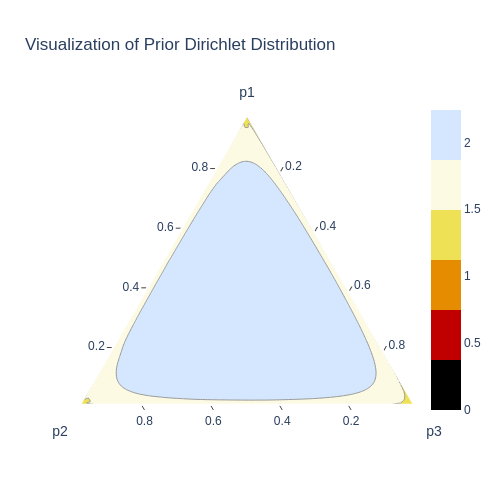

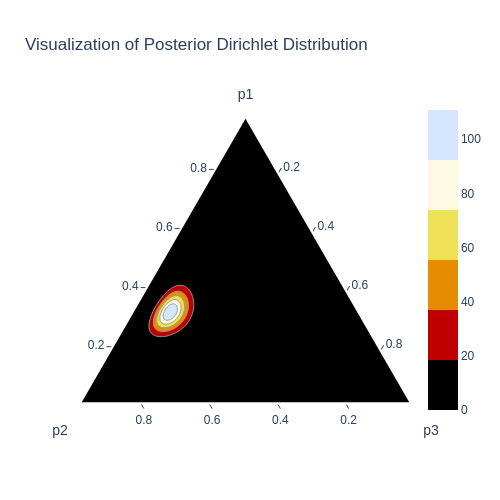

In [19]:
# Visualize the prior Dirichlet distribution

p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array(prior_dirichlet_alphas)
dirichlet_prior = stats.dirichlet(alpha = alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                title = "Visualization of Prior Dirichlet Distribution",
                                colorscale = "Blackbody",
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')


# Visualize the posterior Dirichlet distribution

p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_posterior = np.array(posterior_dirichlet_alphas)
dirichlet_posterior = stats.dirichlet(alpha = alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# https://plotly.com/python/ternary-contour/Links to an external site. 
fig = ff.create_ternary_contour(p.T, dirichlet_posterior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                title = "Visualization of Posterior Dirichlet Distribution",
                                colorscale = "Blackbody",
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')